In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=847adee4475ca16f8b499d1d4e202be710b4ed787386710aff9fe00283bbb5c3
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
dados =  pd.read_csv('crimes.txt.txt', sep =',')
dados

,Crime_id,Zona,Periculosidade,Viaturas_Apoio_Forca_Tatica,Patrulhamento,Policiamento_Ostensivo,Apoio_GCM,Arma_Fogo,Qtde_Vitimas,Possui_DP,Tipo_Policiamento,Area_Residencial,Ocorrencia_Atendida_15_Minutos,Pericia,Possui_UPP,Iluminacao
0,crime_1,Zona_Sul,Altissimo,4,Sim,Sim,Nao,Nao,4,Sim,Patrulhamento_Batalhoes_Diversos,Nao,Nao,Nao,Sim,Sim
1,crime_2,Zona_Sul,Altissimo,5+,Sim,Sim,Nao,Sim,5+,Nao,Policiamento_via_Companhia,Sim,Sim,Nao,Nao,Sim
2,crime_3,Zona_Sul,Altissimo,4,Sim,Sim,Nao,Sim,3,Sim,Batalhao_Dedicado,Sim,Sim,Nao,Sim,Sim
3,crime_4,Zona_Sul,Altissimo,2,Sim,Sim,Nao,Sim,2,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
4,crime_5,Zona_Sul,Altissimo,3,Sim,Sim,Nao,Sim,4,Sim,Policiamento_via_Companhia,Sim,Nao,Nao,Nao,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,crime_776,Zona_Sul,Altissimo,5+,Sim,Sim,Sim,Sim,5+,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
776,crime_777,Zona_Sul,Altissimo,5+,Sim,Sim,Nao,Nao,5+,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
777,crime_778,Zona_Sul,Baixissimo,5+,Sim,Sim,Sim,Sim,5+,Sim,Batalhao_Dedicado,Sim,Sim,Sim,Sim,Sim
778,crime_779,Zona_Sul,Baixo,4,Sim,Sim,Nao,Nao,4,Sim,Batalhao_Dedicado,Sim,Sim,Nao,Sim,Sim


In [ ]:
alinhado = dados.style.set_properties(**{'text-align' : 'center'})
display(alinhado)

In [ ]:
dados.shape

(780, 16)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Crime_id                        780 non-null    object
 1   Zona                            780 non-null    object
 2   Periculosidade                  780 non-null    object
 3   Viaturas_Apoio_Forca_Tatica     780 non-null    object
 4   Patrulhamento                   780 non-null    object
 5   Policiamento_Ostensivo          780 non-null    object
 6   Apoio_GCM                       780 non-null    object
 7   Arma_Fogo                       780 non-null    object
 8   Qtde_Vitimas                    780 non-null    object
 9   Possui_DP                       780 non-null    object
 10  Tipo_Policiamento               780 non-null    object
 11  Area_Residencial                780 non-null    object
 12  Ocorrencia_Atendida_15_Minutos  780 non-null    ob

In [ ]:
dados.isna().sum()

Crime_id                          0
Zona                              0
Periculosidade                    0
Viaturas_Apoio_Forca_Tatica       0
Patrulhamento                     0
Policiamento_Ostensivo            0
Apoio_GCM                         0
Arma_Fogo                         0
Qtde_Vitimas                      0
Possui_DP                         0
Tipo_Policiamento                 0
Area_Residencial                  0
Ocorrencia_Atendida_15_Minutos    0
Pericia                           0
Possui_UPP                        0
Iluminacao                        0
dtype: int64

In [ ]:
df = dados.drop('Crime_id', axis=1)
df

,Zona,Periculosidade,Viaturas_Apoio_Forca_Tatica,Patrulhamento,Policiamento_Ostensivo,Apoio_GCM,Arma_Fogo,Qtde_Vitimas,Possui_DP,Tipo_Policiamento,Area_Residencial,Ocorrencia_Atendida_15_Minutos,Pericia,Possui_UPP,Iluminacao
0,Zona_Sul,Altissimo,4,Sim,Sim,Nao,Nao,4,Sim,Patrulhamento_Batalhoes_Diversos,Nao,Nao,Nao,Sim,Sim
1,Zona_Sul,Altissimo,5+,Sim,Sim,Nao,Sim,5+,Nao,Policiamento_via_Companhia,Sim,Sim,Nao,Nao,Sim
2,Zona_Sul,Altissimo,4,Sim,Sim,Nao,Sim,3,Sim,Batalhao_Dedicado,Sim,Sim,Nao,Sim,Sim
3,Zona_Sul,Altissimo,2,Sim,Sim,Nao,Sim,2,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
4,Zona_Sul,Altissimo,3,Sim,Sim,Nao,Sim,4,Sim,Policiamento_via_Companhia,Sim,Nao,Nao,Nao,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,Zona_Sul,Altissimo,5+,Sim,Sim,Sim,Sim,5+,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
776,Zona_Sul,Altissimo,5+,Sim,Sim,Nao,Nao,5+,Sim,Patrulhamento_Batalhoes_Diversos,Sim,Sim,Sim,Sim,Sim
777,Zona_Sul,Baixissimo,5+,Sim,Sim,Sim,Sim,5+,Sim,Batalhao_Dedicado,Sim,Sim,Sim,Sim,Sim
778,Zona_Sul,Baixo,4,Sim,Sim,Nao,Nao,4,Sim,Batalhao_Dedicado,Sim,Sim,Nao,Sim,Sim


In [ ]:
for col in df.columns:
  dados[col] = dados[col].astype(str) + '--' + col

In [ ]:
df.shape

(780, 15)

In [ ]:
soma = pd.DataFrame(df.apply(pd.value_counts).T.sum(), columns = ['Quantidade'])

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).head(10)

,Quantidade
Sim,5290.0
Nao,2478.0
Zona_Sul,666.0
5+,458.0
Altissimo,421.0
Patrulhamento_Batalhoes_Diversos,382.0
3,368.0
2,314.0
Batalhao_Dedicado,229.0
4,212.0


<Axes: title={'center': 'Quantidade de crimes'}>

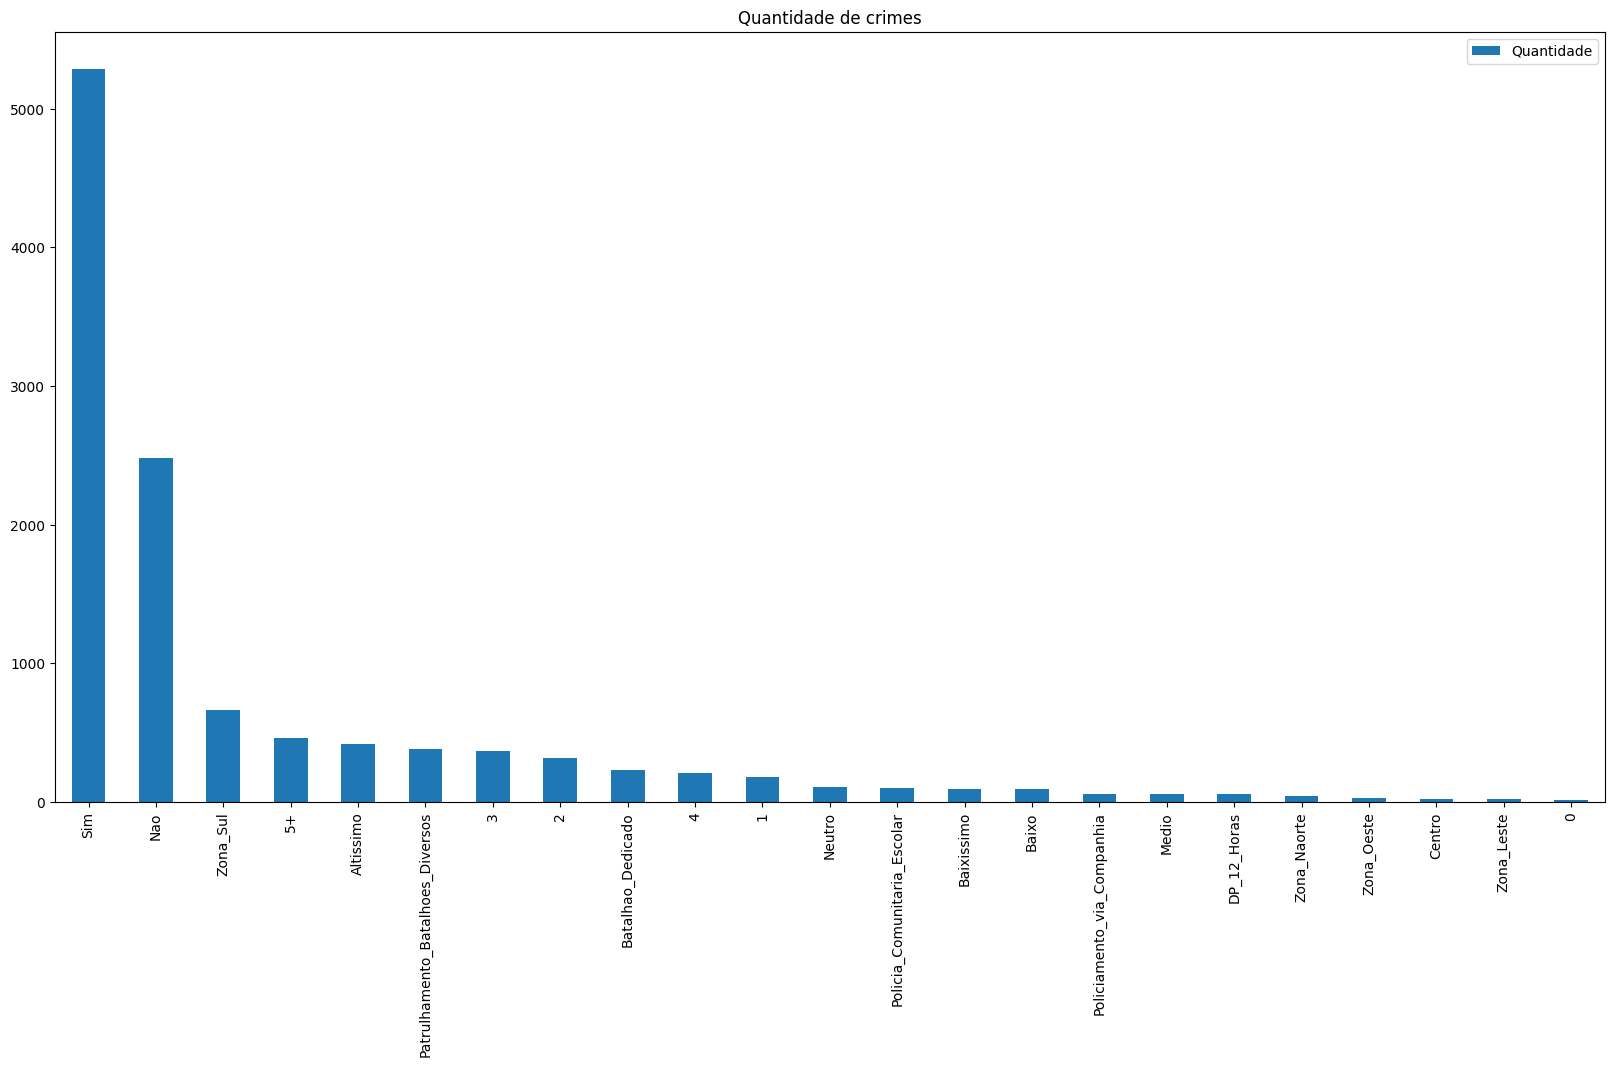

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).plot.bar(figsize=(20,10), title = 'Quantidade de crimes')

<Axes: >

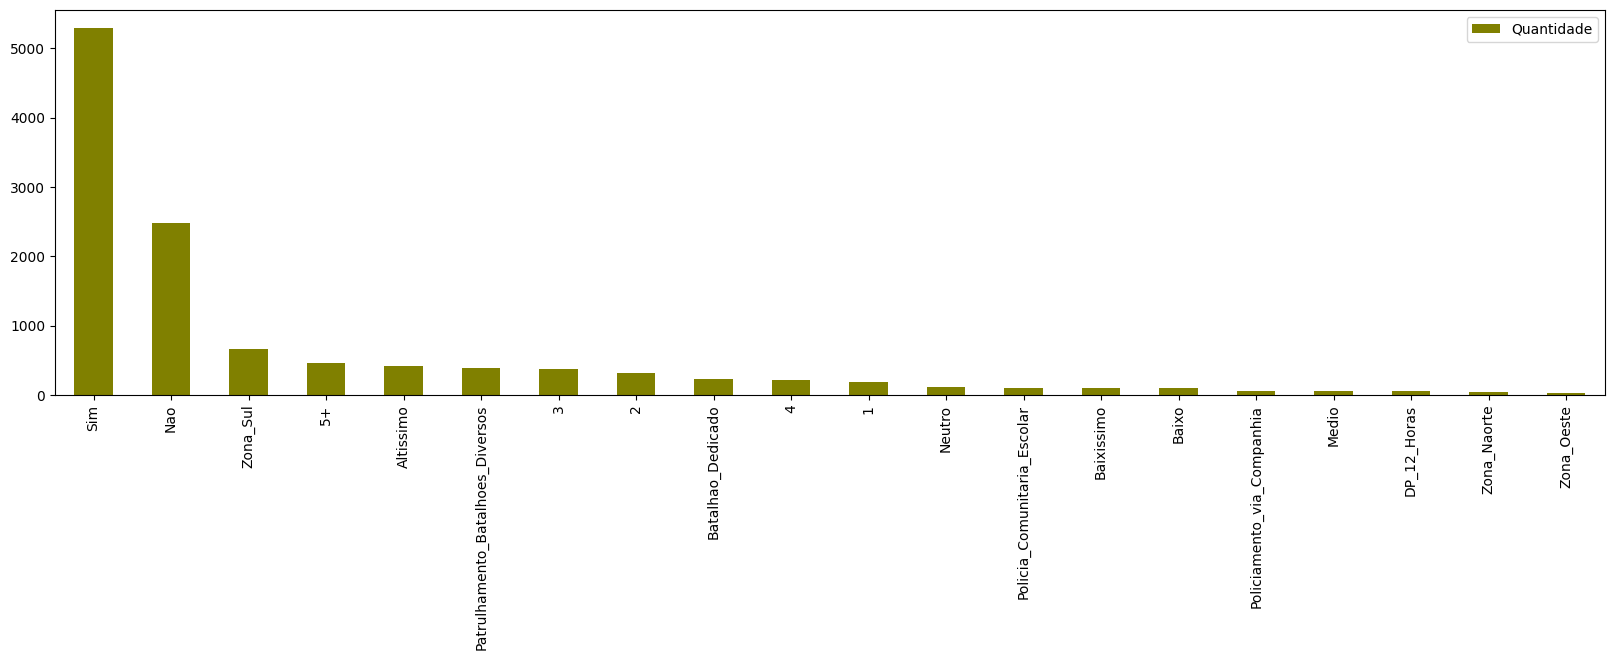

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).head(20).plot.bar(figsize=(20,5), color='olive')

<Axes: >

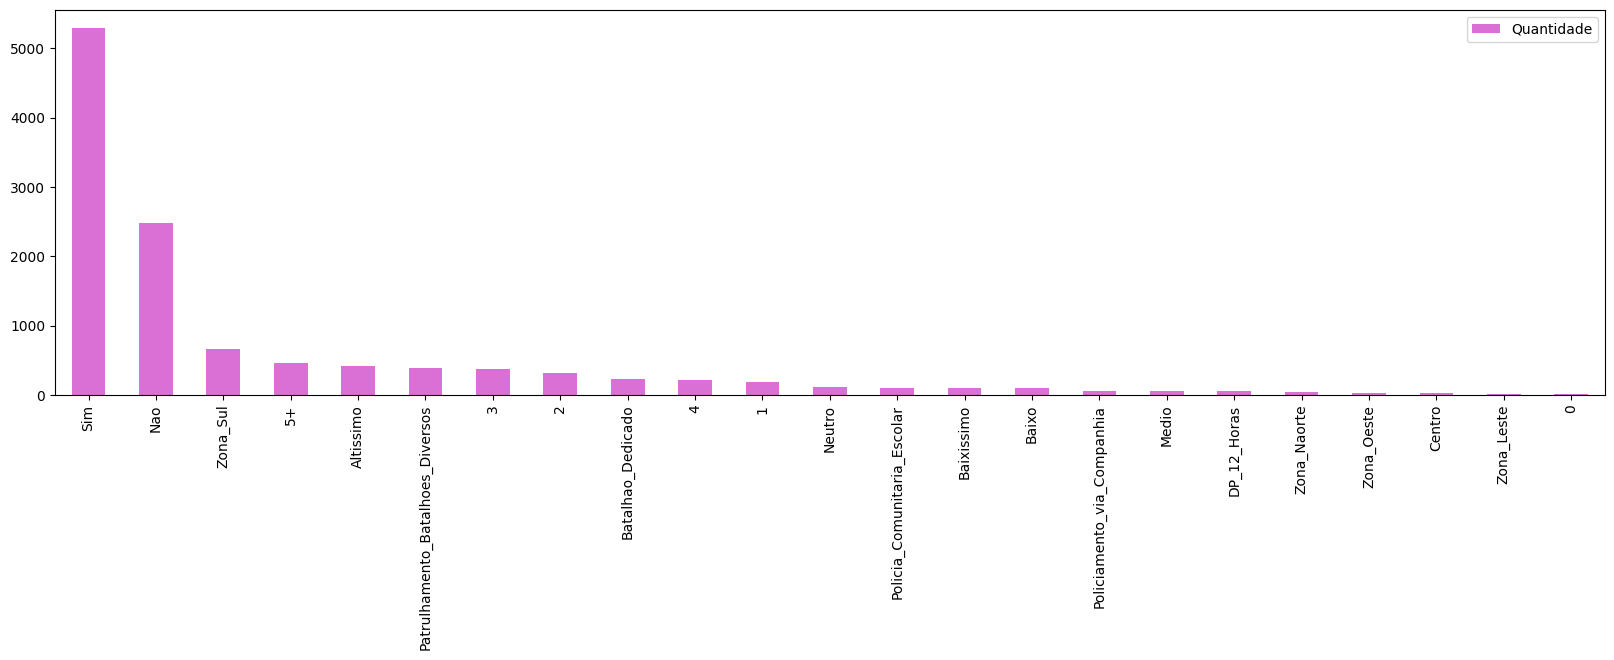

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).head(30).plot.bar(figsize=(20,5), color='orchid')

<Axes: >

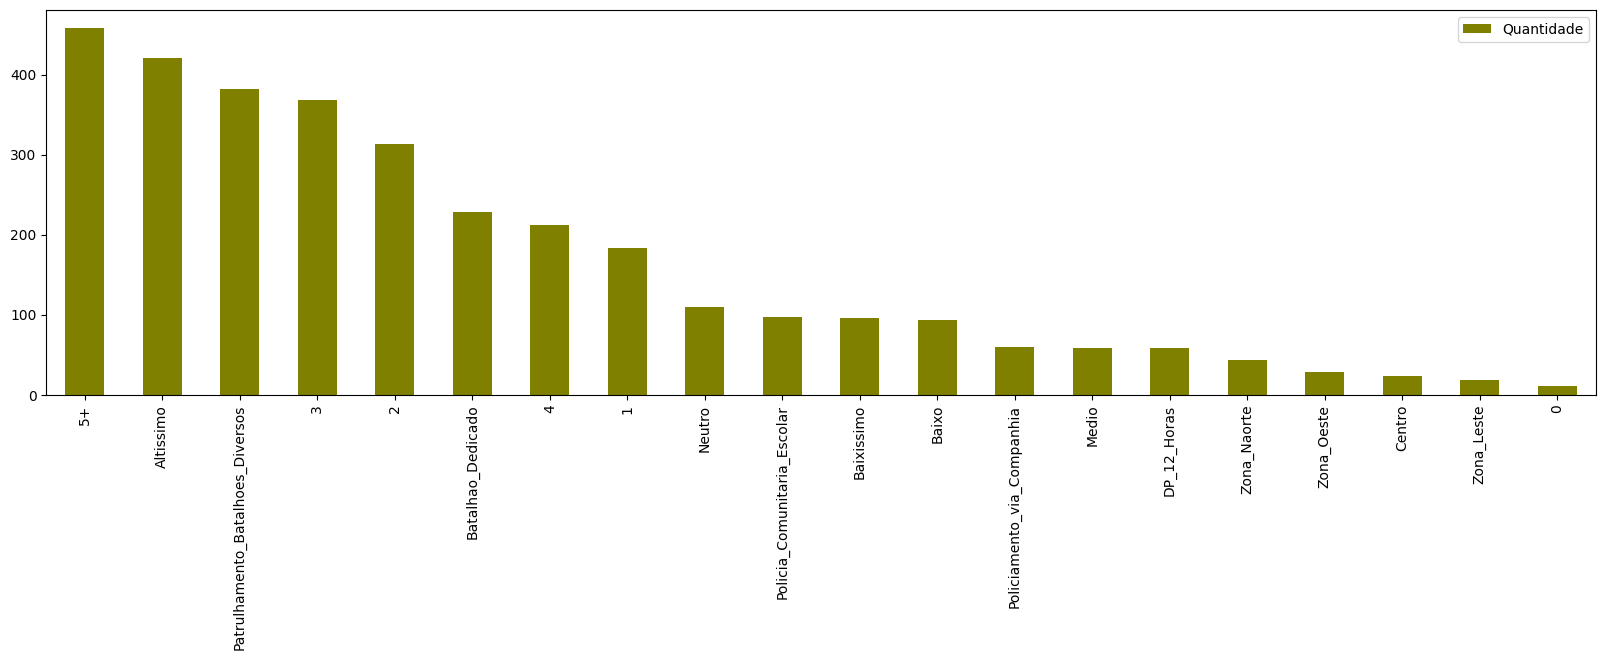

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).tail(20).plot.bar(figsize=(20,5), color='olive')

<Axes: >

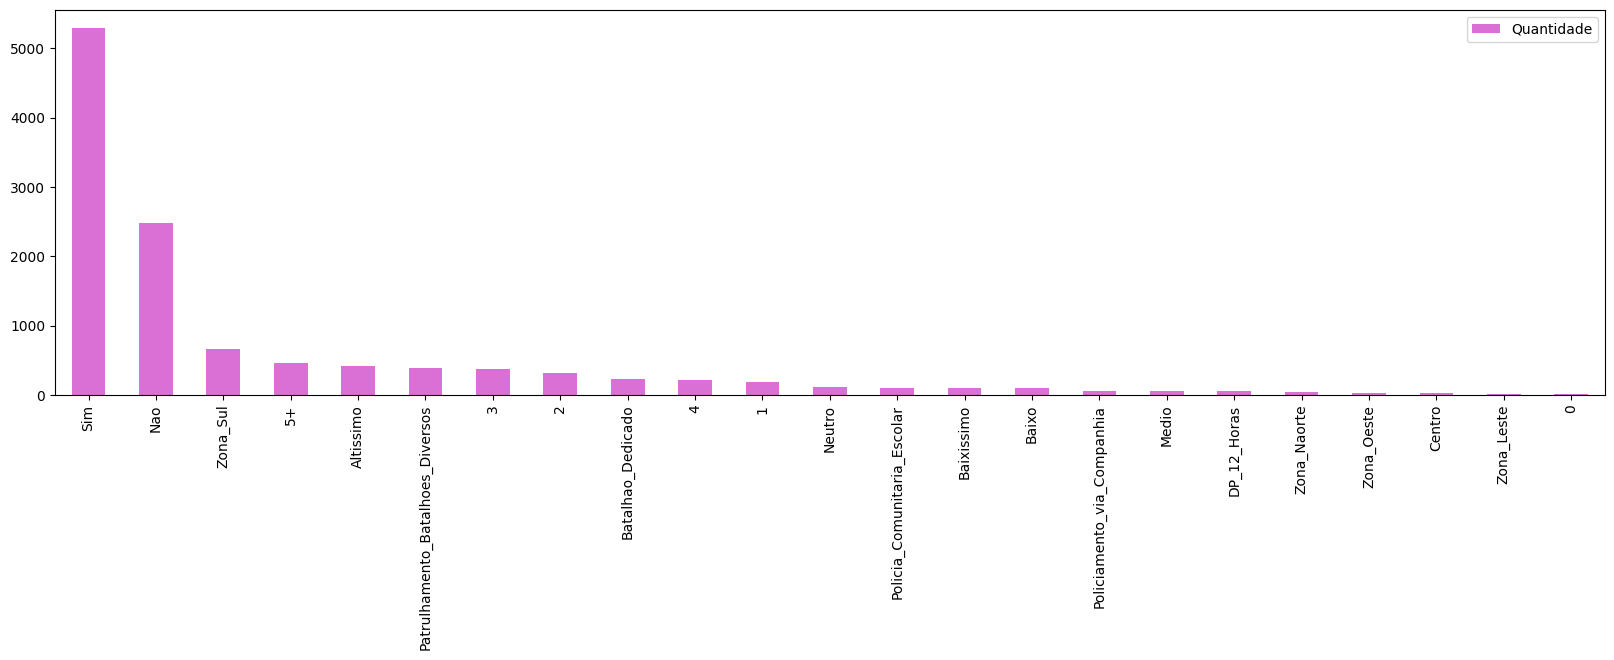

In [ ]:
soma.sort_values(by='Quantidade', ascending=False).head(30).plot.bar(figsize=(20,5), color='orchid')

In [ ]:
df.shape

(780, 15)

In [ ]:
transacoes = []
for i in range(0,780):
  transacoes.append([str(df.values[i,j]) for j in range(15)])

In [ ]:
regras = apriori(transacoes, min_suport=0.003, min_confidence=0.7, min_lift=2, min_lenght=2)

In [ ]:
resultado = list(regras)
resultado

[RelationRecord(items=frozenset({'5+', 'Baixissimo'}), support=0.11025641025641025, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'5+'}), confidence=0.8958333333333333, lift=2.6772030651340994)]),
 RelationRecord(items=frozenset({'Sim', '5+', 'Baixissimo'}), support=0.11025641025641025, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'Sim', '5+'}), confidence=0.8958333333333333, lift=2.6772030651340994), OrderedStatistic(items_base=frozenset({'Sim', 'Baixissimo'}), items_add=frozenset({'5+'}), confidence=0.8958333333333333, lift=2.6772030651340994)]),
 RelationRecord(items=frozenset({'5+', 'Baixissimo', 'Zona_Sul'}), support=0.10897435897435898, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'5+', 'Zona_Sul'}), confidence=0.8854166666666666, lift=2.687256809338521), OrderedStatistic(items_base=frozenset({'Baixissimo', 'Zona_Sul'}), items_add

In [ ]:
resultado2 = [list(x) for x in resultado]
resultado2

[[frozenset({'5+', 'Baixissimo'}),
  0.11025641025641025,
  [OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'5+'}), confidence=0.8958333333333333, lift=2.6772030651340994)]],
 [frozenset({'5+', 'Baixissimo', 'Sim'}),
  0.11025641025641025,
  [OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'Sim', '5+'}), confidence=0.8958333333333333, lift=2.6772030651340994),
   OrderedStatistic(items_base=frozenset({'Sim', 'Baixissimo'}), items_add=frozenset({'5+'}), confidence=0.8958333333333333, lift=2.6772030651340994)]],
 [frozenset({'5+', 'Baixissimo', 'Zona_Sul'}),
  0.10897435897435898,
  [OrderedStatistic(items_base=frozenset({'Baixissimo'}), items_add=frozenset({'5+', 'Zona_Sul'}), confidence=0.8854166666666666, lift=2.687256809338521),
   OrderedStatistic(items_base=frozenset({'Baixissimo', 'Zona_Sul'}), items_add=frozenset({'5+'}), confidence=0.8947368421052632, lift=2.6739261947973385)]],
 [frozenset({'Nao', 'Neutro', 'Patrulhamento

In [ ]:
len(resultado)

6

In [ ]:
reg_associadas = []
for j in range(0,5):
  reg_associadas.append([list(x) for x in resultado[j][2]])

In [ ]:
reg_associadas

[[[frozenset({'Baixissimo'}),
   frozenset({'5+'}),
   0.8958333333333333,
   2.6772030651340994]],
 [[frozenset({'Baixissimo'}),
   frozenset({'5+', 'Sim'}),
   0.8958333333333333,
   2.6772030651340994],
  [frozenset({'Baixissimo', 'Sim'}),
   frozenset({'5+'}),
   0.8958333333333333,
   2.6772030651340994]],
 [[frozenset({'Baixissimo'}),
   frozenset({'5+', 'Zona_Sul'}),
   0.8854166666666666,
   2.687256809338521],
  [frozenset({'Baixissimo', 'Zona_Sul'}),
   frozenset({'5+'}),
   0.8947368421052632,
   2.6739261947973385]],
 [[frozenset({'Neutro'}),
   frozenset({'Nao', 'Patrulhamento_Batalhoes_Diversos'}),
   0.9272727272727274,
   2.0843594445899924]],
 [[frozenset({'Baixissimo'}),
   frozenset({'5+', 'Sim', 'Zona_Sul'}),
   0.8854166666666666,
   2.687256809338521],
  [frozenset({'Baixissimo', 'Sim'}),
   frozenset({'5+', 'Zona_Sul'}),
   0.8854166666666666,
   2.687256809338521],
  [frozenset({'Baixissimo', 'Zona_Sul'}),
   frozenset({'5+', 'Sim'}),
   0.8947368421052632,
   2